# Modelagem

Este notebook tem como objetivo criar o modelo que fará a previsão de novos produtos similares ao produto

## Importação

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

## Leitura dos datasets

* produto_data.csv: Contém os dados do dataset original, contendo apenas as linhas dos produtos, com as informações adicionais de **cluster** e **de_para**
* produto_modelo.csv: Contém o a base do dataset **produto_data** com apenas as colunas pré-filtradas, já aplicados as tratativas de LabelEncoder e StandardScale além da concatenação dos dados das caracteristicas textuais extraidas via scraping.

In [2]:
df_data = pd.read_csv('produto_data.csv')
df_data.drop(columns=['Unnamed: 0'], inplace=True)
df_data.head()

,PedidoProdutoId,ProdutoMarca,ProdutoSubmarca,ProdutoSegmento2,ProdutoTipoContainer,ProdutoTamanhoContainer,ProdutoVariedade,ProdutoSegmento1,ProdutoPercentAlcoolico,cluster,de_para,cluster_caracteristica
0,10946,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,6.0,Blonde,PREMIUM,6.6,4,LEFFE,3
1,19898,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.0,0,ADRIATICA,3
2,80176,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2,ADRIATICA,3
3,66989,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,6.0,-,SUPER PREMIUM,8.0,3,ANDES,3
4,11766,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.2,0,ADRIATICA,3


In [3]:
df = pd.read_csv('produto_model.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,PedidoProdutoId,ProdutoTamanhoContainer,ProdutoPercentAlcoolico,ProdutoVariedade,ProdutoSegmento1,cluster,ale,alto,amargor,amendoim,...,salada,suave,tradicional,trazer,trigar,ºc,água,água maltar,único,cluster_caracteristica
0,10946,1.0,0.733333,0.235294,0.333333,4,0.252081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.095127,0.0,0.0,3
1,20614,1.0,0.555556,0.882353,0.333333,4,0.252081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.095127,0.0,0.0,3
2,64665,1.0,0.733333,0.117647,0.333333,4,0.252081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.095127,0.0,0.0,3
3,17028,1.0,1.000000,0.764706,0.333333,4,0.252081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.095127,0.0,0.0,3
4,53566,1.0,0.833333,0.588235,0.333333,4,0.252081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.095127,0.0,0.0,3


## Separação dos dados do dataset de modelo

O dataset de modelo foi separado em X, contendo todas as features e y, contendo apenas os clusters gerados com base no agrupamento das informações iniciais dos pedidos.

O *y* não detem os agrupamentos corretos, ele apenas é um base line a fim de validar o novo agrupamento/recomendação dos produtos.

In [4]:
X = df.drop(columns=['PedidoProdutoId', 'cluster', 'cluster_caracteristica'])
y = df['cluster_caracteristica']

In [5]:
print('X: ', X.shape)
print('y: ', y.shape)

X:  (179, 104)
y:  (179,)


### Separação dos dados entre treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [7]:
print('X_train: ', X_train.shape, ' y_train: ', y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)

X_train:  (125, 104)  y_train:  (125,)
X_test:  (54, 104)  y_test:  (54,)


### Analisando a quantidade de labels para verificar se os grupos estão balanceados

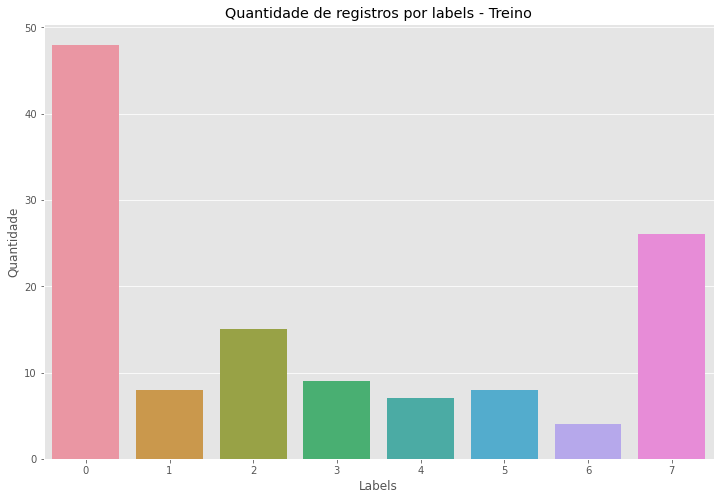

In [8]:
y_counts = y_train.value_counts()

plt.figure(figsize=(12,8))

plt.title('Quantidade de registros por labels - Treino')
sns.barplot(y=y_counts.values, x=y_counts.index)
plt.xlabel('Labels')
plt.ylabel('Quantidade')
plt.show()

## Criação de modelos

#### RandomForest

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score

print('Precisão: ', precision_score(y_train, y_pred, average='weighted'))
print('F1Score: ', f1_score(y_train, y_pred, average='weighted'))
print(confusion_matrix(y_train, y_pred))

Precisão:  1.0
F1Score:  1.0
[[48  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0 26]]


In [11]:
y_pred = model.predict(X_test)

In [12]:
print('Precisão: ', precision_score(y_test, y_pred, average='weighted'))
print('F1Score: ', f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))

Precisão:  0.9861111111111112
F1Score:  0.9817754262198706
[[20  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  4  0  0  1  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0 11]]


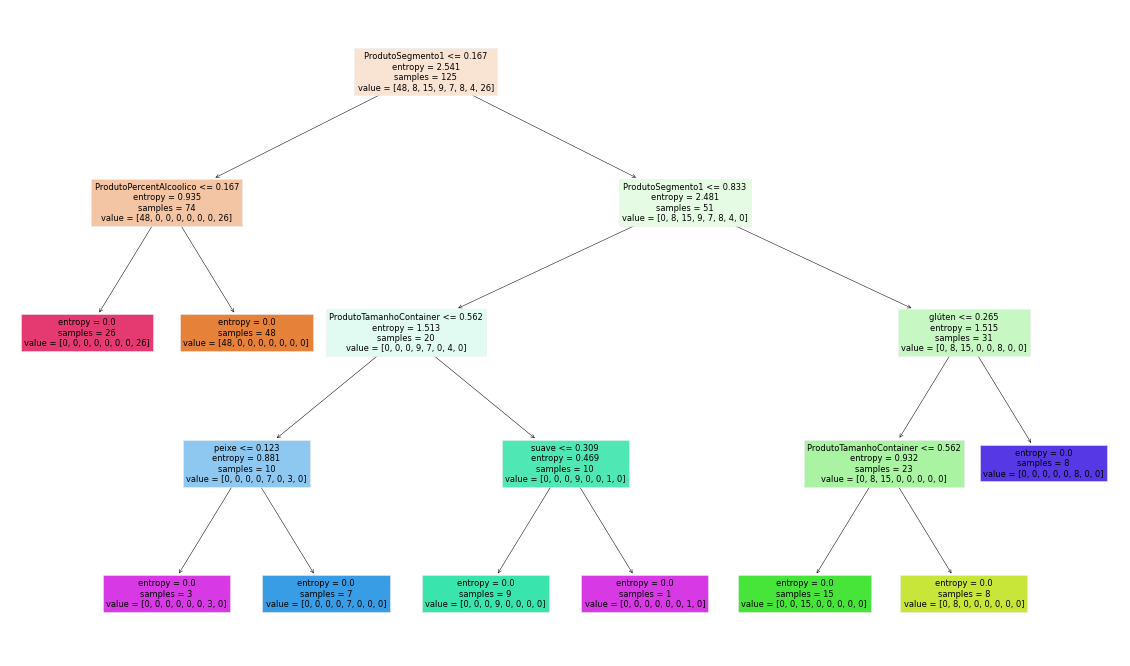

In [13]:
from sklearn import tree

plt.figure(figsize=(20,12))
tree.plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()

### SVM

In [14]:
from sklearn.svm import SVC

model = SVC(kernel='poly', C=1.5, coef0=0.55, probability=True)
model.fit(X_train, y_train)

SVC(C=1.5, coef0=0.55, kernel='poly', probability=True)

In [15]:
y_pred = model.predict(X_train)

In [16]:
print('Precisão: ', precision_score(y_train, y_pred, average='weighted'))
print('F1Score: ', f1_score(y_train, y_pred, average='weighted'))
print(confusion_matrix(y_train, y_pred))

Precisão:  1.0
F1Score:  1.0
[[48  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0 26]]


In [17]:
y_pred = model.predict(X_test)

In [18]:
print('Precisão: ', precision_score(y_test, y_pred, average='weighted'))
print('F1Score: ', f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))

Precisão:  1.0
F1Score:  1.0
[[20  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0 11]]


In [19]:
pickle.dump(model, open('model.pickle', 'wb'))

### Predição

Prever em qual categoria o produto se enquandra e quais itens são similares à ele.

Informações necessárias para o agrupamento/predição do produto

* ProdutoTamanhoContainer
* ProdutoPercentAlcoolico
* ProdutoVariedade
* ProdutoSegmento1
* Descrição completa (Descricao + Harmonização + Temperatura + Ibu)
* Ingredientes
* Alergico


In [20]:
df_predict = pd.DataFrame(columns=['ProdutoTamanhoContainer', 'ProdutoPercentAlcoolico', 'ProdutoVariedade', 'ProdutoSegmento1', 'Descricao', 'Harmonizacao', 'Ingredientes', 'Alergico', 'Temperatura', 'Ibu'])
df_predict

,ProdutoTamanhoContainer,ProdutoPercentAlcoolico,ProdutoVariedade,ProdutoSegmento1,Descricao,Harmonizacao,Ingredientes,Alergico,Temperatura,Ibu


In [21]:
descricao = 'Uma deliciosa cerveja feita no altos montes do imalaia'
harmonizacao = 'O adocicado sabor do mel e a leveja do trigo proporcionam um delecioso sabor. Este produto é otimo em acompanhamentos de pratos doces.'


df_predict.loc[0] = [6.0, 6, 'Blonde', '', descricao, harmonizacao, 'Agua, Trigo, Mel', 'Contém glutem', '0-3', 15]

In [22]:
df_predict

,ProdutoTamanhoContainer,ProdutoPercentAlcoolico,ProdutoVariedade,ProdutoSegmento1,Descricao,Harmonizacao,Ingredientes,Alergico,Temperatura,Ibu
0,6.0,6,Blonde,,Uma deliciosa cerveja feita no altos montes do...,O adocicado sabor do mel e a leveja do trigo p...,"Agua, Trigo, Mel",Contém glutem,0-3,15


In [23]:
encoders: dict = pickle.load(open('encoders_produto.pickle', 'rb'))
scalers: dict = pickle.load(open('scalers_produto.pickle', 'rb'))
# ingredientes_binarizer: MultiLabelBinarizer = pickle.load(open('ingrediente_label.pickle', 'rb'))
# alergicos_binarizer: MultiLabelBinarizer = pickle.load(open('alergico_label.pickle', 'rb'))
tf_idf:TfidfVectorizer = pickle.load(open('tf_idf.pickle', 'rb'))

In [24]:
variedade_encoder: LabelEncoder = encoders.get('ProdutoVariedade')
segmento_encoder: LabelEncoder = encoders.get('ProdutoSegmento1')

In [25]:
df_predict['ProdutoVariedade'] = df_predict['ProdutoVariedade'].apply(lambda x: x if x in variedade_encoder.classes_ else variedade_encoder.classes_[0])
df_predict['ProdutoVariedade'] = variedade_encoder.transform(df_predict['ProdutoVariedade'])

In [26]:
df_predict['ProdutoSegmento1'] = df_predict['ProdutoSegmento1'].apply(lambda x: x if x in segmento_encoder.classes_ else segmento_encoder.classes_[0])
df_predict['ProdutoSegmento1'] = segmento_encoder.transform(df_predict['ProdutoSegmento1'])

In [27]:
container_scaler : MinMaxScaler= scalers.get('ProdutoTamanhoContainer')
percent_alcoolico_scaler: MinMaxScaler = scalers.get('ProdutoPercentAlcoolico')
variedade_scaler: MinMaxScaler = scalers.get('ProdutoVariedade')
segmento1_scaler: MinMaxScaler = scalers.get('ProdutoSegmento1')

In [28]:
df_predict['ProdutoTamanhoContainer'] = container_scaler.transform(df_predict['ProdutoTamanhoContainer'].values.reshape(-1,1))
df_predict['ProdutoPercentAlcoolico'] = percent_alcoolico_scaler.transform(df_predict['ProdutoPercentAlcoolico'].values.reshape(-1,1))
df_predict['ProdutoVariedade'] = variedade_scaler.transform(df_predict['ProdutoVariedade'].values.reshape(-1,1))
df_predict['ProdutoSegmento1'] = segmento1_scaler.transform(df_predict['ProdutoSegmento1'].values.reshape(-1,1))

In [29]:
df_predict['Descricao'] = df_predict['Descricao'] + '. ' + df_predict['Harmonizacao'] + '. '+ df_predict['Ingredientes'] + '. '+ df_predict['Alergico'] + '. ' + df_predict['Temperatura'] + '. ' + df_predict['Ibu'].astype(str)
df_predict.drop(columns=['Harmonizacao', 'Ingredientes', 'Alergico', 'Temperatura', 'Ibu'], inplace=True)

In [30]:
df_predict

,ProdutoTamanhoContainer,ProdutoPercentAlcoolico,ProdutoVariedade,ProdutoSegmento1,Descricao
0,1.0,0.666667,0.235294,0.0,Uma deliciosa cerveja feita no altos montes do...


In [31]:
bow = tf_idf.transform(df_predict['Descricao'])

In [32]:
features = pd.DataFrame(bow.toarray(), columns=tf_idf.get_feature_names())
df_predict = pd.concat([df_predict, features], axis=1)
df_predict.drop(columns=['Descricao'], inplace=True)

In [33]:
df_predict

,ProdutoTamanhoContainer,ProdutoPercentAlcoolico,ProdutoVariedade,ProdutoSegmento1,ale,alto,amargor,amendoim,ano,aromar,...,sabor,salada,suave,tradicional,trazer,trigar,ºc,água,água maltar,único
0,1.0,0.666667,0.235294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.83167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
print(model.predict_proba(df_predict))
y_pred = model.predict(df_predict)[0]
print(y_pred)

[[0.19361623 0.04670743 0.07907772 0.2642556  0.10047251 0.04494004
  0.05703962 0.21389086]]
3


In [35]:
df_data[df_data['cluster_caracteristica'] == y_pred][0:3]

,PedidoProdutoId,ProdutoMarca,ProdutoSubmarca,ProdutoSegmento2,ProdutoTipoContainer,ProdutoTamanhoContainer,ProdutoVariedade,ProdutoSegmento1,ProdutoPercentAlcoolico,cluster,de_para,cluster_caracteristica
0,10946,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,6.0,Blonde,PREMIUM,6.6,4,LEFFE,3
1,19898,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.0,0,ADRIATICA,3
2,80176,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2,ADRIATICA,3
